<a href="https://colab.research.google.com/github/CrisMcode111/DI_Bootcamp/blob/main/w4_d2_challenge_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daily Challenge: Logistic Regression for Admission Prediction
What you will create
You will create a logistic regression model that uses examination scores to predict university admission.
dataset available here

Your Task
* Data Exploration: Load and visualize the data.

Use pandas to load the dataset and examine the first few rows.
Create a scatter plot to visualize the data points for students who were admitted versus those who were not based on their exam scores.
* Applying Logistic Regression with scikit-learn:

Implement logistic regression using the LogisticRegression function from scikit-learn to find the best parameters for your model.
Train the logistic regression model on your dataset.
* Making Predictions:

Use the trained logistic regression model to make predictions on your dataset.
Calculate the accuracy of your model.
* Model Evaluation:

Interpret the result of logistic regression and the accuracy of your model.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


(100, 3)


,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


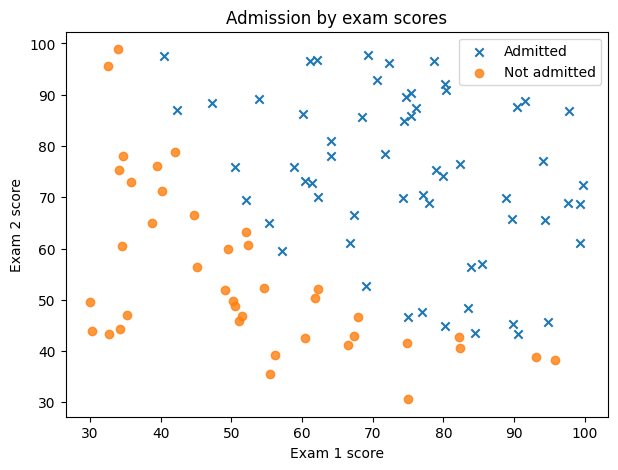

Accuracy: 0.89


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


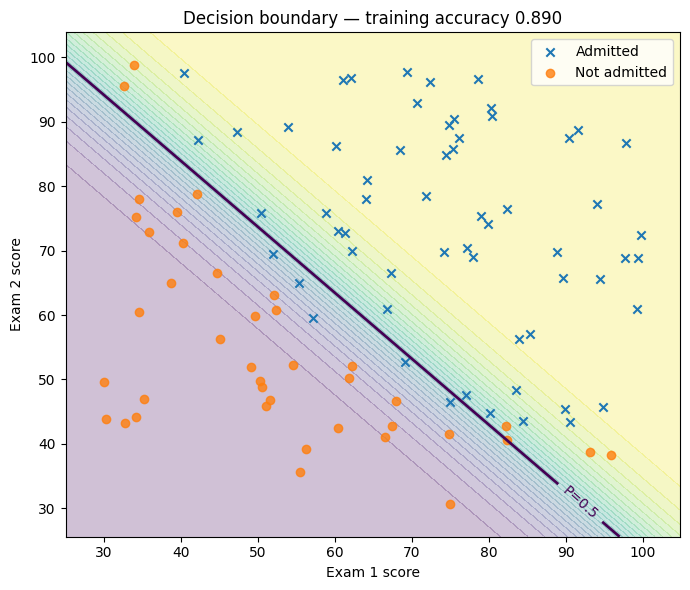

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# ---- Load TXT from RAW GitHub URL (no header, comma-separated) ----
url = "https://raw.githubusercontent.com/kaleko/CourseraML/master/ex2/data/ex2data1.txt"
df = pd.read_csv(url, header=None, sep=",", names=["Exam1","Exam2","Admitted"])

print(df.shape)
display(df.head())

# ---- Scatter plot (admitted vs not) ----
plt.figure(figsize=(7,5))
ad = df[df["Admitted"]==1]
na = df[df["Admitted"]==0]
plt.scatter(ad["Exam1"], ad["Exam2"], label="Admitted", marker="x")
plt.scatter(na["Exam1"], na["Exam2"], label="Not admitted", alpha=0.8)
plt.xlabel("Exam 1 score"); plt.ylabel("Exam 2 score")
plt.title("Admission by exam scores")
plt.legend(); plt.show()

# ---- Train Logistic Regression ----
X = df[["Exam1","Exam2"]]
y = df["Admitted"]

model = LogisticRegression()
model.fit(X, y)

# ---- Predictions + accuracy ----
y_pred = model.predict(X)
acc = accuracy_score(y, y_pred)
print("Accuracy:", round(acc, 3))

# ---- (Optional) Probability threshold and a quick decision boundary plot ----
import numpy as np
x_min, x_max = X["Exam1"].min()-5, X["Exam1"].max()+5
y_min, y_max = X["Exam2"].min()-5, X["Exam2"].max()+5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
probs = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1].reshape(xx.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx, yy, probs, levels=25, alpha=0.25)
cs = plt.contour(xx, yy, probs, levels=[0.5], linewidths=2)
plt.clabel(cs, inline=True, fmt={0.5:'P=0.5'})
plt.scatter(ad["Exam1"], ad["Exam2"], label="Admitted", marker="x")
plt.scatter(na["Exam1"], na["Exam2"], label="Not admitted", alpha=0.8)
plt.xlabel("Exam 1 score"); plt.ylabel("Exam 2 score")
plt.title(f"Decision boundary — training accuracy {acc:.3f}")
plt.legend(); plt.tight_layout(); plt.show()


Interpretation
The logistic regression model learns a linear decision boundary that separates admitted and non-admitted students based on their exam scores.
The accuracy score shows the proportion of correct predictions on the training set.
The decision boundary (P = 0.5 line) represents the threshold where the model is equally likely to predict admission or not.
Points on one side of the boundary are classified as admitted (probability > 0.5), while those on the other side are classified as not admitted.
This confirms that logistic regression is suitable for binary classification and produces interpretable probabilities that can guide decision-making.